In [ ]:
# list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data='/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/'

In [ ]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

# Data Augumentation


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Specify the path to your original dataset
original_dataset_path = '/content/drive/MyDrive/Tuberculosis_final-Copy/TB_Chest_Radiography_Database/Tuberculosis'

# Specify the path to store the augmented dataset
augmented_dataset_path = '/content/drive/MyDrive/tb'

# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Ensure the output directory for augmented images exists
if not os.path.exists(augmented_dataset_path):
    os.makedirs(augmented_dataset_path)

# List all files in the original dataset directory
original_images = os.listdir(original_dataset_path)

# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))  # Adjust target size as needed
    img_array = img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)  # Reshape to (1, height, width, channels) for flow() method
    return img_array

# Generate augmented images
for img_file in original_images:
    img_path = os.path.join(original_dataset_path, img_file)
    img = load_and_preprocess_image(img_path)

    # Generate augmented images and save to the output directory
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=augmented_dataset_path, save_prefix='Tuberculosis', save_format='jpg'):
        i += 1
        if i >= 4:  # Generate 4 augmented images per original image
            break

# After running this code, you should have an augmented dataset with approximately 2500 images in the 'augmented_dataset_path' directory.


In [ ]:
images[:20]

['/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/45.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/827.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/387.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/72.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/348.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/799.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/936.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/722.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiography_Database/Tuberculosis/650.jpg',
 '/content/drive/MyDrive/Tuberculosis_final - Copy/TB_Chest_Radiog

In [ ]:
len(images)

5420

In [ ]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])
#Extracting Class Values

In [ ]:
class_values[:10]

['Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis',
 'Tuberculosis']

In [ ]:
len(class_values)

5420

In [ ]:
temp = list(zip(images,class_values))
#Zipping Image Paths and Class Labels
random.shuffle(temp)
#reordering ensures that the pairing of image paths and class labels is maintained
images, class_values = zip(*temp)
#Unzipping the Shuffled Data
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'class_label'])
#Creating a Pandas DataFrame

In [ ]:
data

,image_path,class_label
0,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
1,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
3,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
4,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
...,...,...
5415,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
5416,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
5417,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
5418,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis


In [ ]:
data.class_label.value_counts()

class_label
Normal          3504
Tuberculosis    1916
Name: count, dtype: int64

In [ ]:
df_c0 = data[data['class_label'] =="Tuberculosis"]
df_c1 = data[data['class_label'] =="Normal"]

In [ ]:
from sklearn.utils import resample
unsampled_df_c0 = resample(df_c0, replace=True, random_state=23, n_samples=1916)
unsampled_df_c1 = resample(df_c1, replace=True, random_state=23, n_samples=3500)
#each containing 100 samples randomly drawn with replacement from their respective original datasets

In [ ]:
df_unsampled = pd.concat([unsampled_df_c0, unsampled_df_c1])
df_unsampled

,image_path,class_label
1676,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2112,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
3002,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2691,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
4307,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
...,...,...
1709,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2189,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4925,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4925,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal


In [ ]:
df_unsampled.head()

,image_path,class_label
1676,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2112,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
3002,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2691,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
4307,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis


In [ ]:
df_unsampled.tail()

,image_path,class_label
1709,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2189,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4925,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4925,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4669,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal


In [ ]:
df_unsampled.class_label.value_counts()

class_label
Normal          3500
Tuberculosis    1916
Name: count, dtype: int64

In [ ]:
df_unsampled.shape

(5416, 2)

In [ ]:
data = df_unsampled.sample(frac=1)
data.shape

(5416, 2)

In [ ]:
data[:10]

,image_path,class_label
1602,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2365,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4170,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2411,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
3471,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
2089,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4427,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
4529,/content/drive/MyDrive/Tuberculosis_final - Co...,Tuberculosis
2623,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal
4258,/content/drive/MyDrive/Tuberculosis_final - Co...,Normal


<ipython-input-22-2d1eefe42530>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))
<ipython-input-22-2d1eefe42530>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class_label')

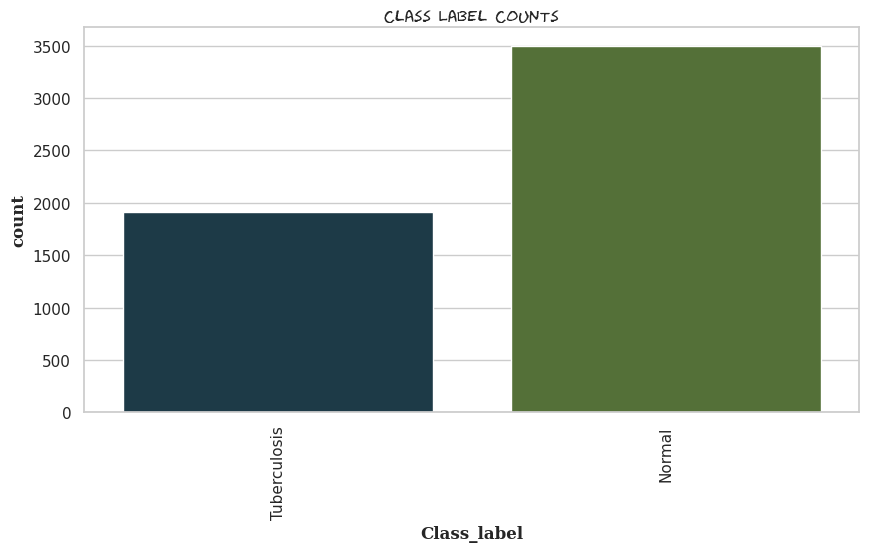

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [ ]:
import cv2
import numpy as np
from tqdm import tqdm  # Optional, for progress bar

def resize_image(img_path):
    file = cv2.imread(img_path)
    resized = cv2.resize(file, (224, 224), interpolation=cv2.INTER_AREA)
    return resized

# Assuming data['image_path'] contains the paths of the original images
images = [resize_image(img_path) for img_path in tqdm(data['image_path'], desc="Resizing images")]

# Convert the list of images to a single NumPy array
images_array = np.stack(images, axis=0)

# Now, images_array is a single NumPy array containing all the resized images
print(images_array.shape)


Resizing images: 100%|██████████| 5416/5416 [35:16<00:00,  2.56it/s]


(5416, 224, 224, 3)


In [ ]:
len(images)

5416

In [ ]:
data['class_label'][:15]

1602          Normal
2365          Normal
4170          Normal
2411          Normal
3471          Normal
2089          Normal
4427    Tuberculosis
4529    Tuberculosis
2623          Normal
4258          Normal
23      Tuberculosis
3320    Tuberculosis
3157    Tuberculosis
4975    Tuberculosis
1466          Normal
Name: class_label, dtype: object

In [ ]:
class_names = list(data['class_label'])

In [ ]:
  images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'Normal')

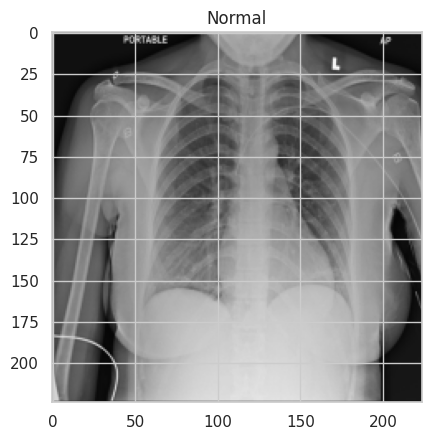

In [ ]:
plt.imshow(images[86])
plt.title(class_names[86])

Text(0.5, 1.0, 'Normal')

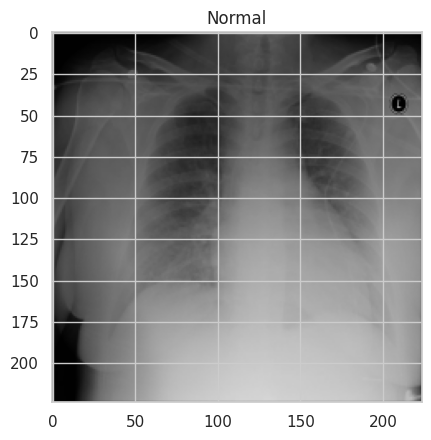

In [ ]:
plt.imshow(images[188])
plt.title(class_names[188])

In [ ]:
images = np.array(images)

In [ ]:
images.shape

(5416, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['class_label'])
# y contain the binary representation of the class labels

In [ ]:
enc.classes_

array(['Normal', 'Tuberculosis'], dtype='<U12')

In [ ]:
data['class_label'][:10]

1602          Normal
2365          Normal
4170          Normal
2411          Normal
3471          Normal
2089          Normal
4427    Tuberculosis
4529    Tuberculosis
2623          Normal
4258          Normal
Name: class_label, dtype: object

In [ ]:
y[:10]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [ ]:
y=np.array(y)
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.2, stratify=y, random_state=43)

In [ ]:
y_train[:5]

array([[0],
       [1],
       [1],
       [0],
       [1]])

In [ ]:
y = []
for i in data['class_label']:
    if i == 'Normal':
        k = [1, 0]
        y.append(k)
    else:
        k = [0, 1]
        y.append(k)

In [ ]:
y[:5]

[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]

In [ ]:
y=np.array(y)
y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])